In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# read data

df_NRI = pd.read_csv("NRI_Table_CensusTracts_FL_short.csv")
df_risk = df_NRI.filter(items=["TRACT","POPULATION","RISK_SCORE","EAL_SCORE","RISK_RATNG","COUNTY"])

In [4]:
# https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

In [5]:
# read more data

df_RE = pd.read_csv("FL_income.csv")
df_RE = df_RE.filter(items=["geographic_area_name","families_median_income"])

In [6]:
#attempt to extract tract number in order to merge

df_TRACT = df_RE['geographic_area_name'].str.split(";", expand=True)

In [7]:
#more delimiting

df_TRACT = df_TRACT[0].str.split(" ", expand=True)

In [8]:
#add this to our new data frame

df_NEW = df_RE.assign(TRACT=df_TRACT[2])

In [9]:
# make it equivalent to the other tract numbers

df_NEW = df_NEW.filter(items=['families_median_income','TRACT'])
df_NEW['TRACT'] = df_NEW['TRACT'].astype('float64')
df_NEW['TRACT'] = (df_NEW['TRACT'] * 100).round()
df_NEW['TRACT'] = df_NEW['TRACT'].astype('int64')

In [10]:
# merge it

df_final = pd.merge(df_risk, df_NEW, on='TRACT')

In [11]:
# drop duplicates

df_final = df_final.drop_duplicates(subset=['TRACT'])

In [12]:
df_final = df_final.dropna()

In [13]:
df_final

,TRACT,POPULATION,RISK_SCORE,EAL_SCORE,RISK_RATNG,COUNTY,families_median_income
0,201,4348,59.603767,64.702774,Relatively Low,Alachua,-
49,202,4782,53.066879,53.649858,Relatively Low,Alachua,-
85,301,3384,70.146982,67.550555,Relatively Moderate,Alachua,48464
134,302,2644,65.697094,63.389858,Relatively Moderate,Alachua,65109
198,400,5330,83.301622,76.332292,Relatively Moderate,Alachua,55224
...,...,...,...,...,...,...,...
10075,950607,4771,99.538601,99.513822,Very High,Walton,120432
10076,950608,2701,97.421871,97.253212,Very High,Walton,95511
10077,950609,2678,99.351900,99.615990,Very High,Walton,115048
10078,950610,4532,98.903582,99.473894,Very High,Walton,152019


In [14]:
mask = df_final['families_median_income'] == "-"
df_final = df_final[~mask]

In [15]:
regress = smf.ols('POPULATION ~ RISK_SCORE', data=df_final).fit()
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             POPULATION   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     748.2
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          5.86e-150
Time:                        11:25:41   Log-Likelihood:                -32480.
No. Observations:                3638   AIC:                         6.496e+04
Df Residuals:                    3636   BIC:                         6.498e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -346.7663    173.580     -1.998      0.046    -687.090      -6.443
RISK_SCORE    57.6525      2.108     27.353      0.000      53.520      61.785
==============================================================================
Omnibus:                     1371.990   Durbin-Watson:                   1.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9756.431
Skew:                           1.618   Prob(JB):                         0.00
Kurtosis:                      10.341   Cond. No.                         473.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df_final['families_median_income'] = df_final['families_median_income'].replace("250,000+", 250000)

/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_final['families_median_income'] = df_final['families_median_income'].astype('int64')

/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
regress = smf.ols('RISK_SCORE ~ families_median_income', data=df_final).fit()
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RISK_SCORE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04599
Date:                Sun, 21 Apr 2024   Prob (F-statistic):              0.830
Time:                        11:25:41   Log-Likelihood:                -14854.
No. Observations:                3638   AIC:                         2.971e+04
Df Residuals:                    3636   BIC:                         2.972e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 81.2135      0.611    132.820      0.000      80.015      82.412
families_median_income -1.368e-06   6.38e-06     -0.214      0.830   -1.39e-05    1.11e-05
==============================================================================
Omnibus:                      654.160   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1116.466
Skew:                          -1.170   Prob(JB):                    3.65e-243
Kurtosis:                       4.373   Cond. No.                     2.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

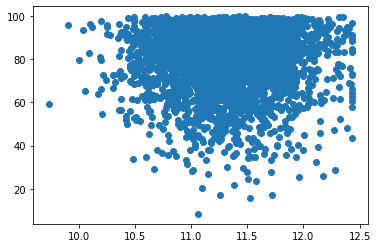

In [19]:
plt.scatter(np.log(df_final['families_median_income']), df_final['RISK_SCORE'])
plt.show()

In [20]:
df_final = df_final.assign(LOG=np.log(df_final['families_median_income']))
df_final

,TRACT,POPULATION,RISK_SCORE,EAL_SCORE,RISK_RATNG,COUNTY,families_median_income,LOG
85,301,3384,70.146982,67.550555,Relatively Moderate,Alachua,48464,10.788577
134,302,2644,65.697094,63.389858,Relatively Moderate,Alachua,65109,11.083818
198,400,5330,83.301622,76.332292,Relatively Moderate,Alachua,55224,10.919153
223,500,5441,81.371593,82.654955,Relatively Moderate,Alachua,96591,11.478241
248,600,4544,72.823812,61.003593,Relatively Moderate,Alachua,27402,10.218371
...,...,...,...,...,...,...,...,...
10075,950607,4771,99.538601,99.513822,Very High,Walton,120432,11.698841
10076,950608,2701,97.421871,97.253212,Very High,Walton,95511,11.466997
10077,950609,2678,99.351900,99.615990,Very High,Walton,115048,11.653105
10078,950610,4532,98.903582,99.473894,Very High,Walton,152019,11.931761


In [21]:
regress = smf.ols('RISK_SCORE ~ LOG', data=df_final).fit()
regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RISK_SCORE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01754
Date:                Sun, 21 Apr 2024   Prob (F-statistic):              0.895
Time:                        11:25:41   Log-Likelihood:                -14854.
No. Observations:                3638   AIC:                         2.971e+04
Df Residuals:                    3636   BIC:                         2.972e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.2052      6.706     11.960      0.000      67.057      93.353
LOG            0.0785      0.593      0.132      0.895      -1.084       1.241
==============================================================================
Omnibus:                      655.164   Durbin-Watson:                   1.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.265
Skew:                          -1.171   Prob(JB):                    9.01e-244
Kurtosis:                       4.377   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# nothing of significance from linear regression models, no pattern can be found, and thus there seems to be no association between income and risk
# rating

In [23]:
mask = (df_final['RISK_RATNG'] == "Relatively High")
df = df_final[mask]

In [24]:
# find minimum threshold to be considered high risk

df.min()

TRACT                                 100
POPULATION                            877
RISK_SCORE                        85.2542
EAL_SCORE                         73.7382
RISK_RATNG                Relatively High
COUNTY                            Alachua
families_median_income              20018
LOG                               9.90439
dtype: object

In [25]:
# return a list of tracts that have high risk

mask = df_final['RISK_SCORE'] >= 85
df2 = df_final[mask]

In [26]:
# group them by county

df2['COUNTY'].value_counts()

Broward         298
Palm Beach      172
Miami-Dade      165
Hillsborough    120
Brevard         112
Pasco            75
Lee              73
Pinellas         71
Collier          68
St. Lucie        55
Manatee          39
Escambia         34
Citrus           34
Indian River     33
Volusia          32
Bay              32
Okaloosa         29
Orange           25
Sarasota         24
Hernando         23
Monroe           21
Polk             20
Duval            20
Charlotte        17
Osceola          16
Walton           14
Putnam           12
St. Johns        12
Alachua          12
Seminole         10
Lake              9
Okeechobee        9
Highlands         8
Jackson           7
Santa Rosa        7
Columbia          6
Marion            6
Martin            6
Gadsden           6
Calhoun           4
Hendry            4
Sumter            4
Levy              4
Leon              3
Gulf              3
Dixie             3
Hardee            3
Holmes            2
Taylor            2
Suwannee          2


In [27]:
# in order to calculate total tracts with high risk ratings

df_final['RISK_RATNG'].value_counts()

Relatively High        1523
Relatively Moderate    1479
Relatively Low          388
Very High               237
Very Low                 11
Name: RISK_RATNG, dtype: int64

In [28]:
# take a value an alpha value of 0.05, because it's single-tailed not double-tailed

alpha = (1523 + 237) * 0.05
alpha

88.0

In [29]:
counties_at_risk = df2['COUNTY'].value_counts()
mask = counties_at_risk >= alpha
counties_at_risk[mask]

Broward         298
Palm Beach      172
Miami-Dade      165
Hillsborough    120
Brevard         112
Name: COUNTY, dtype: int64

In [30]:
# check out the total population in each county that is in danger

df2.groupby('COUNTY').sum()[mask]

/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,TRACT,POPULATION,RISK_SCORE,EAL_SCORE,families_median_income,LOG
COUNTY,,,,,,
Brevard,7402372,535224,10479.887504,10506.314442,9897823,1269.775931
Broward,17392171,1563333,27594.266993,27146.844540,27113336,3378.121731
Hillsborough,1408787,726546,10953.401037,10783.405360,10937047,1361.279299
Miami-Dade,2187302,775844,14918.780621,14383.701294,14180970,1853.998730
Palm Beach,1118226,817627,15992.287019,15919.880452,18121764,1974.581445


In [31]:
# thus any county with more than 44 instances of very high or relatively high in their county should definitely be included in the aid policy

In [32]:
# read more data

df_housing = pd.read_csv("FL_housing.csv")
df_housing.filter(items=['geographic_area_name','total_housing_units','vacant_housing_units','occupied_housing_units'])

,geographic_area_name,total_housing_units,vacant_housing_units,occupied_housing_units
0,Census Tract 2.01; Alachua County; Florida,2232,272,1960
1,Census Tract 2.02; Alachua County; Florida,1935,245,1690
2,Census Tract 3.01; Alachua County; Florida,2113,297,1816
3,Census Tract 3.02; Alachua County; Florida,1393,156,1237
4,Census Tract 4; Alachua County; Florida,2401,159,2242
...,...,...,...,...
5155,Census Tract 9701.04; Washington County; Florida,1174,163,1011
5156,Census Tract 9702; Washington County; Florida,1648,299,1349
5157,Census Tract 9703.01; Washington County; Florida,1295,250,1045
5158,Census Tract 9703.02; Washington County; Florida,2238,358,1880


In [33]:
# add housing data to our relevant data frame

df_TRACT2 = df_housing['geographic_area_name'].str.split(";", expand=True)
df_TRACT2 = df_TRACT2[0].str.split(" ", expand=True)
df_NEW = df_housing.assign(TRACT=df_TRACT[2])
df_NEW = df_NEW.filter(items=['total_housing_units','vacant_housing_units','occupied_housing_units','TRACT'])
df_NEW['TRACT'] = df_NEW['TRACT'].astype('float64')
df_NEW['TRACT'] = (df_NEW['TRACT'] * 100).round()
df_NEW['TRACT'] = df_NEW['TRACT'].astype('int64')
df_final2 = pd.merge(df_final, df_NEW, on='TRACT')
df_final2 = df_final2.drop_duplicates(subset=['TRACT'])

In [34]:
df_final2

,TRACT,POPULATION,RISK_SCORE,EAL_SCORE,RISK_RATNG,COUNTY,families_median_income,LOG,total_housing_units,vacant_housing_units,occupied_housing_units
0,301,3384,70.146982,67.550555,Relatively Moderate,Alachua,48464,10.788577,2113,297,1816
7,302,2644,65.697094,63.389858,Relatively Moderate,Alachua,65109,11.083818,1393,156,1237
15,400,5330,83.301622,76.332292,Relatively Moderate,Alachua,55224,10.919153,2401,159,2242
20,500,5441,81.371593,82.654955,Relatively Moderate,Alachua,96591,11.478241,2842,391,2451
25,600,4544,72.823812,61.003593,Relatively Moderate,Alachua,27402,10.218371,2168,256,1912
...,...,...,...,...,...,...,...,...,...,...,...
4975,950607,4771,99.538601,99.513822,Very High,Walton,120432,11.698841,3907,1495,2412
4976,950608,2701,97.421871,97.253212,Very High,Walton,95511,11.466997,3149,1749,1400
4977,950609,2678,99.351900,99.615990,Very High,Walton,115048,11.653105,8790,7057,1733
4978,950610,4532,98.903582,99.473894,Very High,Walton,152019,11.931761,4926,2915,2011


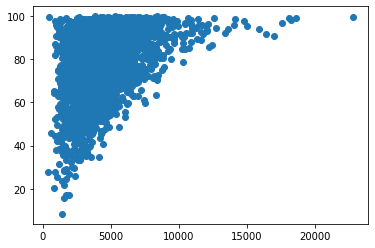

In [48]:
# graph on association between total houses and risk score, very weak association, dead end

plt.scatter(df_final2['POPULATION'], df_final2['RISK_SCORE'])
plt.show()

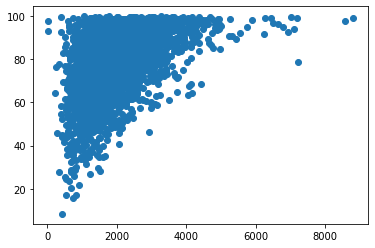

In [35]:
# graph on association between total houses and risk score, very weak association, dead end

plt.scatter(df_final2['total_housing_units'], df_final2['RISK_SCORE'])
plt.show()

In [36]:
# lin reg on association between total houses and risk score, very weak association, dead end

house_regress = smf.ols('RISK_SCORE ~ total_housing_units', data=df_final2).fit()
house_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RISK_SCORE   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     872.2
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          5.27e-172
Time:                        11:25:42   Log-Likelihood:                -14463.
No. Observations:                3638   AIC:                         2.893e+04
Df Residuals:                    3636   BIC:                         2.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              66.5924      0.536    124.350      0.000      65.542      67.642
total_housing_units     0.0073      0.000     29.532      0.000       0.007       0.008
==============================================================================
Omnibus:                      492.841   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              736.252
Skew:                          -0.982   Prob(JB):                    1.33e-160
Kurtosis:                       4.002   Cond. No.                     5.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

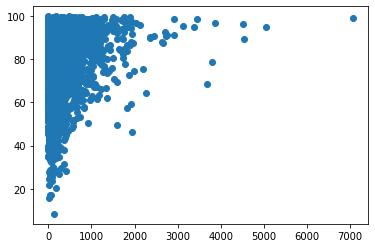

In [47]:
# graph on association between vacant houses and risk score, very weak association, dead end

plt.scatter(df_final2['vacant_housing_units'], df_final2['RISK_SCORE'])
plt.show()

In [38]:
# lin reg on association between vacant houses and risk score, very weak association, dead end
house_regress = smf.ols('RISK_SCORE ~ vacant_housing_units', data=df_final2).fit()
house_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RISK_SCORE   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           4.71e-28
Time:                        11:25:43   Log-Likelihood:                -14794.
No. Observations:                3638   AIC:                         2.959e+04
Df Residuals:                    3636   BIC:                         2.960e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               79.1013      0.295    267.929      0.000      78.522      79.680
vacant_housing_units     0.0065      0.001     11.074      0.000       0.005       0.008
==============================================================================
Omnibus:                      631.594   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1056.641
Skew:                          -1.146   Prob(JB):                    3.58e-230
Kurtosis:                       4.312   Cond. No.                         636.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

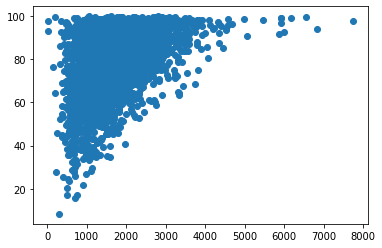

In [46]:
# graph on association between occupied houses and risk score, very weak association, dead end

plt.scatter(df_final2['occupied_housing_units'], df_final2['RISK_SCORE'])
plt.show()

In [40]:
# lin reg on association between occupied houses and risk score, very weak association, dead end
house_regress = smf.ols('RISK_SCORE ~ occupied_housing_units', data=df_final2).fit()
house_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RISK_SCORE   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     784.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.82e-156
Time:                        11:25:43   Log-Likelihood:                -14499.
No. Observations:                3638   AIC:                         2.900e+04
Df Residuals:                    3636   BIC:                         2.901e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 67.2172      0.540    124.378      0.000      66.158      68.277
occupied_housing_units     0.0082      0.000     28.007      0.000       0.008       0.009
==============================================================================
Omnibus:                      490.419   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              732.874
Skew:                          -0.976   Prob(JB):                    7.22e-160
Kurtosis:                       4.010   Cond. No.                     4.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# based off linear regression models, there doesn't seem to be much of an association between the housing and risk score

In [42]:
# multiple regression attempt, seems like no association/very weak association, thus this is most likely a dead end

house_regress = smf.ols('RISK_SCORE ~ occupied_housing_units + vacant_housing_units + LOG + POPULATION', data=df_final2).fit()
house_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RISK_SCORE   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     249.7
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          9.73e-190
Time:                        11:25:43   Log-Likelihood:                -14412.
No. Observations:                3638   AIC:                         2.883e+04
Df Residuals:                    3633   BIC:                         2.887e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 82.6540      5.961     13.867      0.000      70.967      94.341
occupied_housing_units     0.0030      0.001      4.679      0.000       0.002       0.004
vacant_housing_units       0.0065      0.001     11.817      0.000       0.005       0.008
LOG                       -1.5477      0.529     -2.926      0.003      -2.585      -0.511
POPULATION                 0.0020      0.000      8.714      0.000       0.002       0.003
==============================================================================
Omnibus:                      489.181   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              726.347
Skew:                          -0.980   Prob(JB):                    1.89e-158
Kurtosis:                       3.974   Cond. No.                     1.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# find low-income families and see if they coincide with the counties at risk

mask = df_final2['families_median_income'] <= 30000
df_final2[mask]['COUNTY'].value_counts()

Miami-Dade      5
Hillsborough    4
Duval           3
Broward         2
St. Lucie       2
Alachua         1
Orange          1
Okaloosa        1
Palm Beach      1
Indian River    1
Leon            1
Name: COUNTY, dtype: int64

In [44]:
# find the maximum threshold to be considered relatively low risk or safer

mask = df_final2['RISK_RATNG'] == "Relatively Low"
df_tmp = df_final2[mask]
df_tmp.max()

TRACT                             961602
POPULATION                          7512
RISK_SCORE                       61.9845
EAL_SCORE                         79.698
RISK_RATNG                Relatively Low
COUNTY                           Volusia
families_median_income            250000
LOG                              12.4292
total_housing_units                 3494
vacant_housing_units                1934
occupied_housing_units              2754
dtype: object

In [45]:
# list of potential counties to redirect people in high-risk areas into

# these are counties that are low risk or moderate risk and the numbers show the amount of vacant housing units in the county which the new displaced
# people can move into

mask = df_final2['RISK_SCORE'] < 85
df_safe = df_final2[mask]
df_safe.groupby('COUNTY').sum()['vacant_housing_units']

COUNTY
Alachua         11027
Baker             886
Bay              5845
Brevard          8532
Broward         26596
Charlotte        1461
Citrus            863
Clay             4865
Collier          9766
Columbia         1189
Dixie            1100
Duval           28044
Escambia         2027
Flagler           263
Franklin         1405
Gilchrist         432
Gulf              443
Hamilton          615
Hernando         1345
Highlands        7230
Hillsborough    14863
Indian River     1257
Jackson          1186
Jefferson        1222
Lake             8149
Lee             20367
Leon             5614
Levy              368
Manatee          3356
Marion           5503
Martin            569
Miami-Dade      51966
Monroe            612
Nassau           1007
Okaloosa          345
Okeechobee        360
Orange          41766
Osceola         13828
Palm Beach      18877
Pasco            4550
Pinellas        62345
Polk            17864
Putnam            409
Santa Rosa        205
Sarasota         9719
Sem